In [1]:
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
from scipy.stats import norm

hfi = erk.get_hfi_returns()

c:\Users\Skyler\GitHub\edhec_risk_kit.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv("edhec-hedgefundindices.csv",


## Semi-Deviation:

In [2]:
#First, let's find the population standard deviation by Hedge Fund
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [3]:
#We can use a Boolean Mask (a series of trues or falses) to start developing our code for semi-deviation
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [4]:
#Call function to report semi-deviation by Hedge Fund
erk.semideviation3(hfi["2009":"2018"])

Convertible Arbitrage     0.010382
CTA Global                0.019215
Distressed Securities     0.016712
Emerging Markets          0.023606
Equity Market Neutral     0.007202
Event Driven              0.015833
Fixed Income Arbitrage    0.006490
Global Macro              0.009689
Long/Short Equity         0.018519
Merger Arbitrage          0.007640
Relative Value            0.009502
Short Selling             0.031207
Funds Of Funds            0.012246
dtype: float64

## VaR:

There are THREE different ways to compute VaR:

- Historic VaR
- Parametric VaR: Gaussian
- Modified VaR: Cornish-Fisher

#### Historic VaR

In [5]:
#We can use np.percentile to find the 5th percentile VaR by Hedge Funds
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [6]:
#Call function to report Historic VaR at the 5th percentile by Hedge Fund
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

#### Parametric VaR (Gaussian)

In [7]:
#Search the normal table for z-scores by Hedge Fund corresponding to the 5% VaR
z = norm.ppf(0.05)
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [8]:
#Call function to report Gaussian VaR at the 5th percentile by Hedge Fund
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

#### Modified VaR (Cornish-Fisher)

In [9]:
#Call function to report Modified VaR by Hedge Fund
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

#### Compare VaR methods

<Axes: title={'center': 'EDHEC Hedge Fund Incidies: VaR'}>

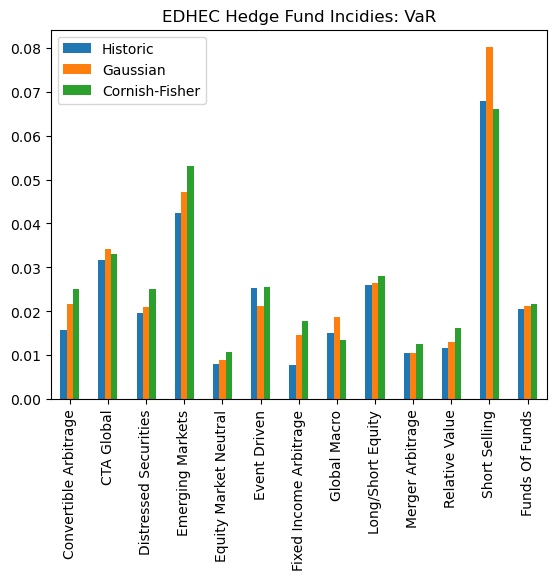

In [10]:
#Visualize VaR by method and Hedge Fund
var_list = [erk.var_historic(hfi), erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True)]
comparison=pd.concat(var_list, axis=1)
comparison.columns = ["Historic", "Gaussian", "Cornish-Fisher"]
comparison.plot.bar(title="EDHEC Hedge Fund Incidies: VaR")

## CVaR:

In [11]:
#Call function to report the 5% CVaR by Hedge Fund (based on Histroic )
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [12]:
#Call function to report the 5% CVaR by Hedge Fund (based on Gaussian VaR)
erk.cvar_gaussian(hfi)

Convertible Arbitrage     0.049687
CTA Global                0.043527
Distressed Securities     0.040864
Emerging Markets          0.083820
Equity Market Neutral     0.018292
Event Driven              0.037440
Fixed Income Arbitrage    0.052500
Global Macro              0.025783
Long/Short Equity         0.043162
Merger Arbitrage          0.019143
Relative Value            0.026733
Short Selling             0.106620
Funds Of Funds            0.034185
dtype: float64

In [13]:
#Call function to report the 5% CVaR by Hedge Fund (based on Modified VaR)
erk.cvar_gaussian(hfi, modified=True)

Convertible Arbitrage     0.058200
CTA Global                0.042000
Distressed Securities     0.055600
Emerging Markets          0.092488
Equity Market Neutral     0.021044
Event Driven              0.039331
Fixed Income Arbitrage    0.052500
Global Macro              0.019244
Long/Short Equity         0.044558
Merger Arbitrage          0.023400
Relative Value            0.029310
Short Selling             0.093075
Funds Of Funds            0.034185
dtype: float64

#### Compare CVaR methods

<Axes: title={'center': 'EDHEC Hedge Fund Incidies: CVaR'}>

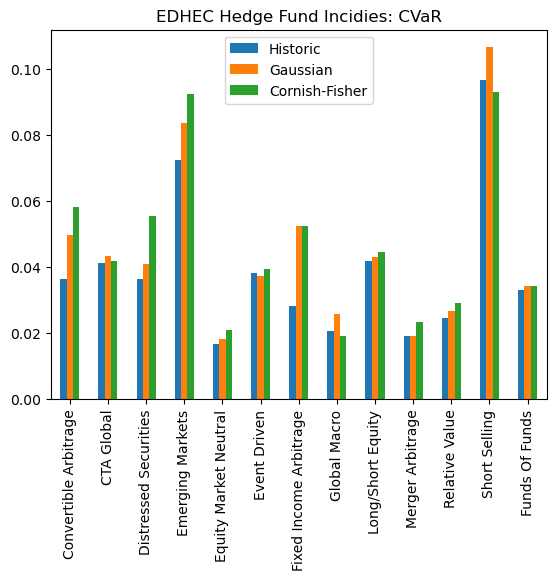

In [14]:
#Visualize CVaR by VaR mehtod and Hedge Fund
var_list = [erk.cvar_historic(hfi), erk.cvar_gaussian(hfi), erk.cvar_gaussian(hfi, modified=True)]
comparison=pd.concat(var_list, axis=1)
comparison.columns = ["Historic", "Gaussian", "Cornish-Fisher"]
comparison.plot.bar(title="EDHEC Hedge Fund Incidies: CVaR")